In [9]:
import pandas as pd
import numpy as np
from scipy.stats import t as t
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def moving_grubbs(data, window_size, alpha=0.05):

    n = len(data)
    outliers = []

    for i in range(window_size, n):
        window = data[i-window_size:i]

        mean = np.mean(window)
        sd = np.std(window, ddof=1)

        G = np.abs(window - mean) / sd
        Gmax = np.max(G)


        t_dist = t(df=window_size-2)
        critical_value = (window_size-1) / np.sqrt(window_size) * \
                         np.sqrt(t_dist.ppf(1-alpha/(2*window_size-2))**2 / \
                         (window_size-2+t_dist.ppf(1-alpha/(2*window_size-2))**2))
        if Gmax > critical_value:
            outliers.append(data[i])

    return outliers

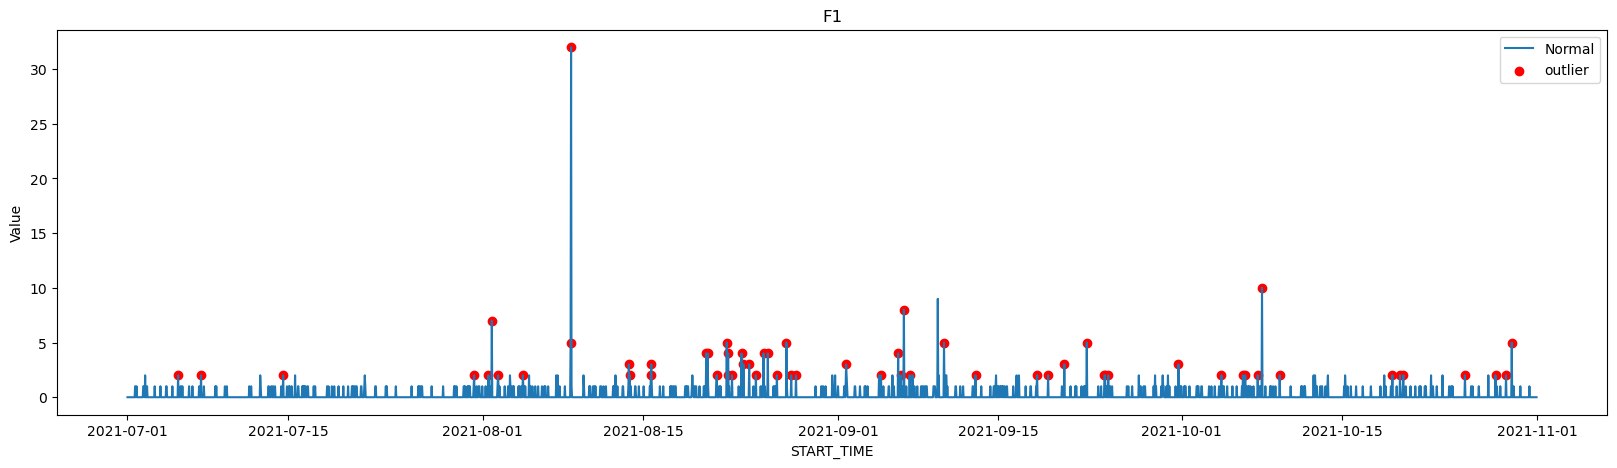

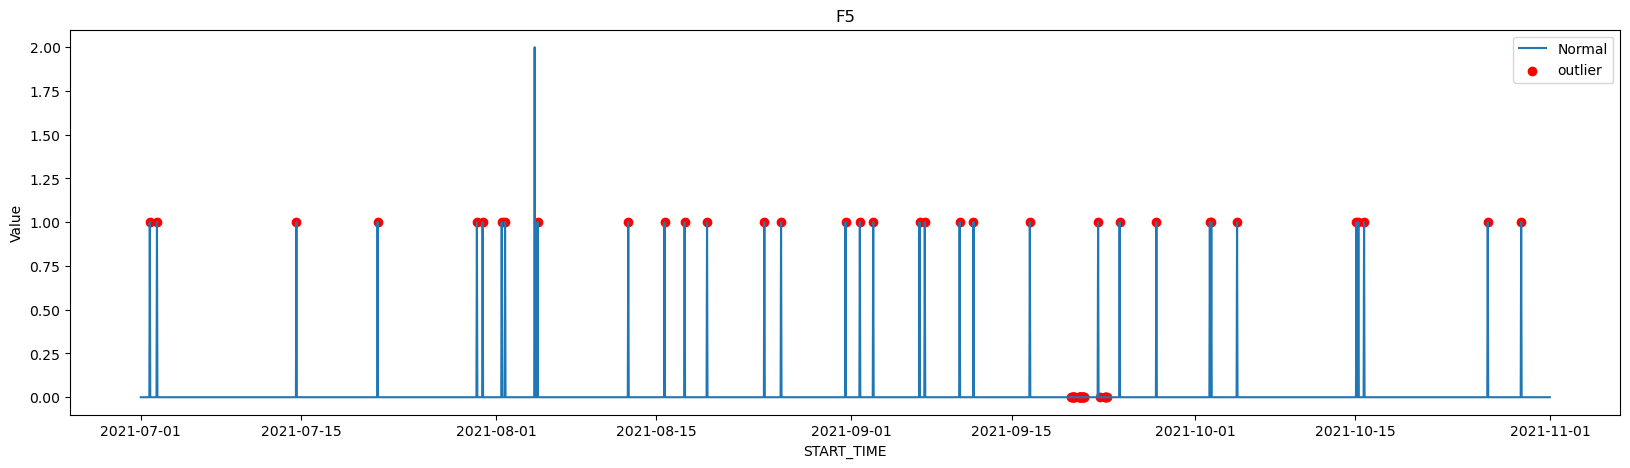

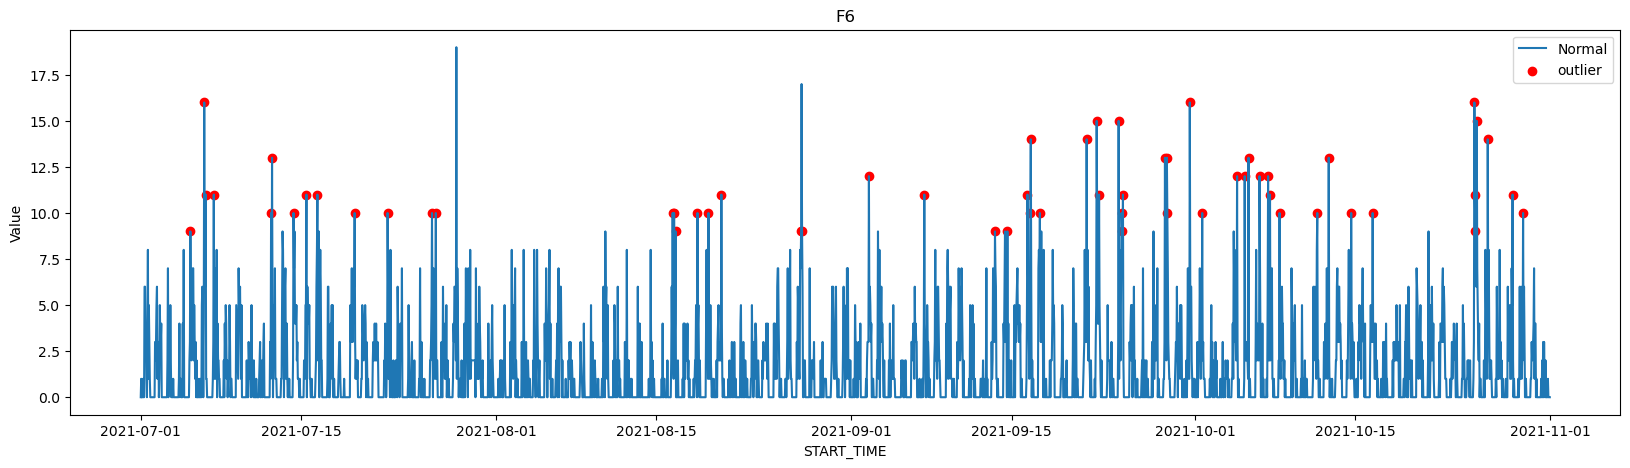

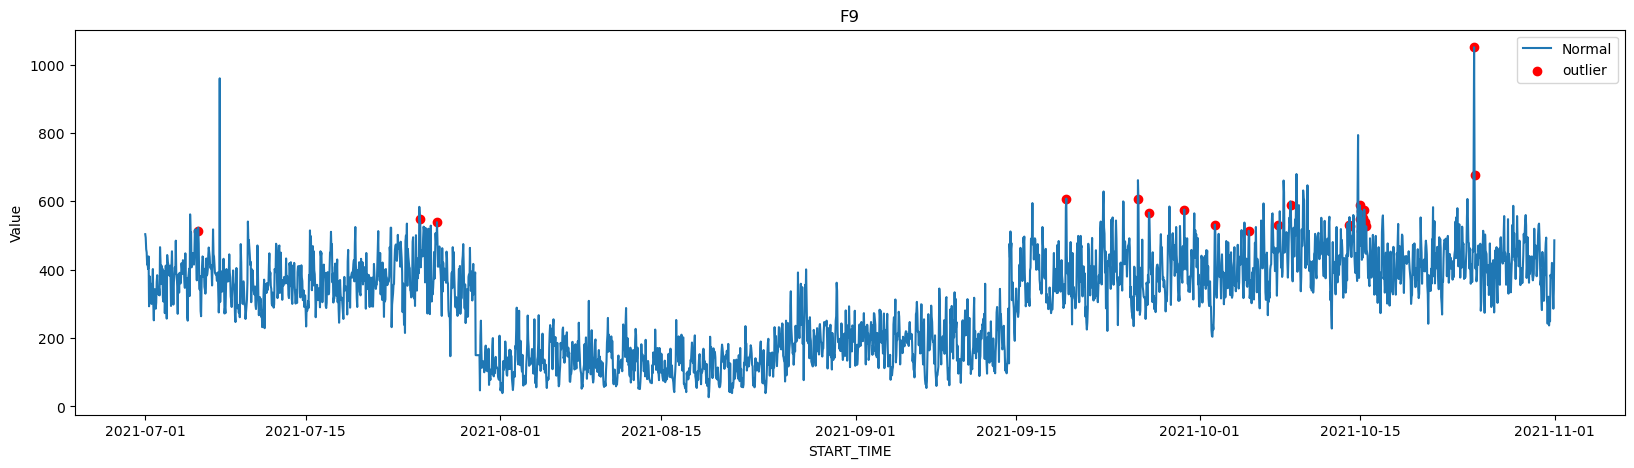

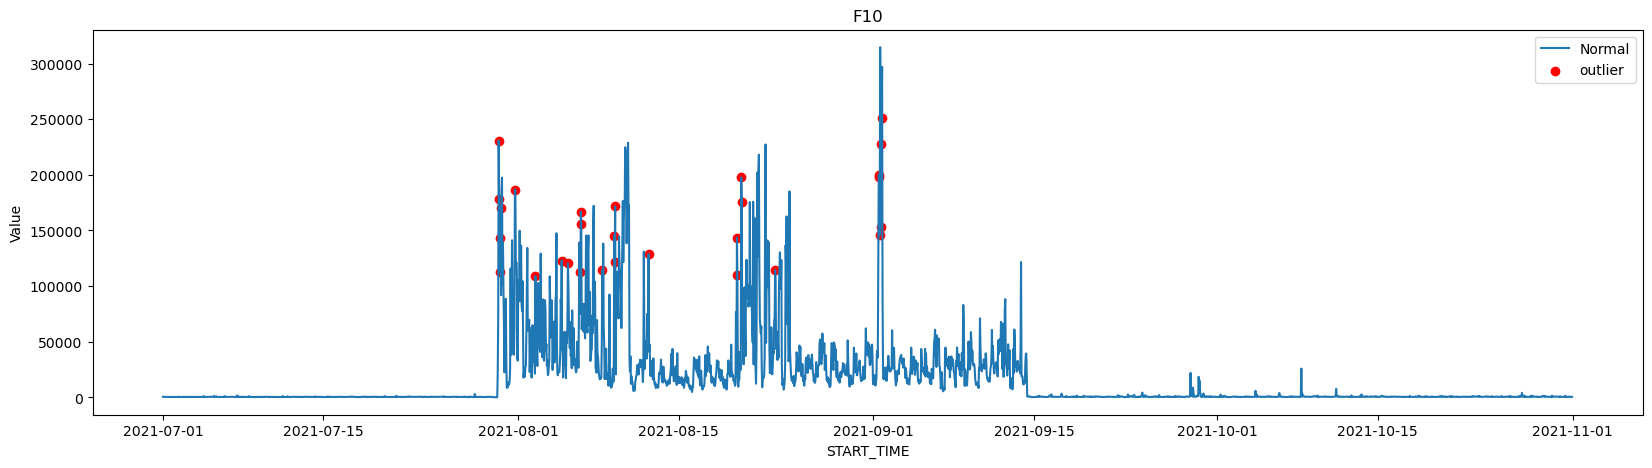

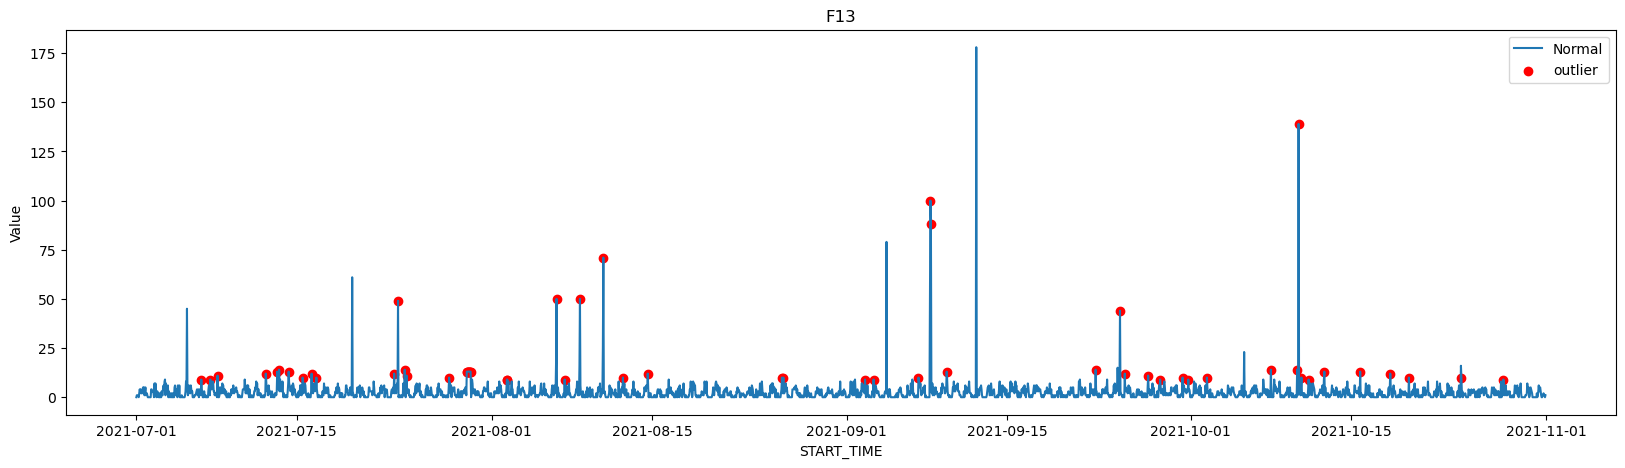

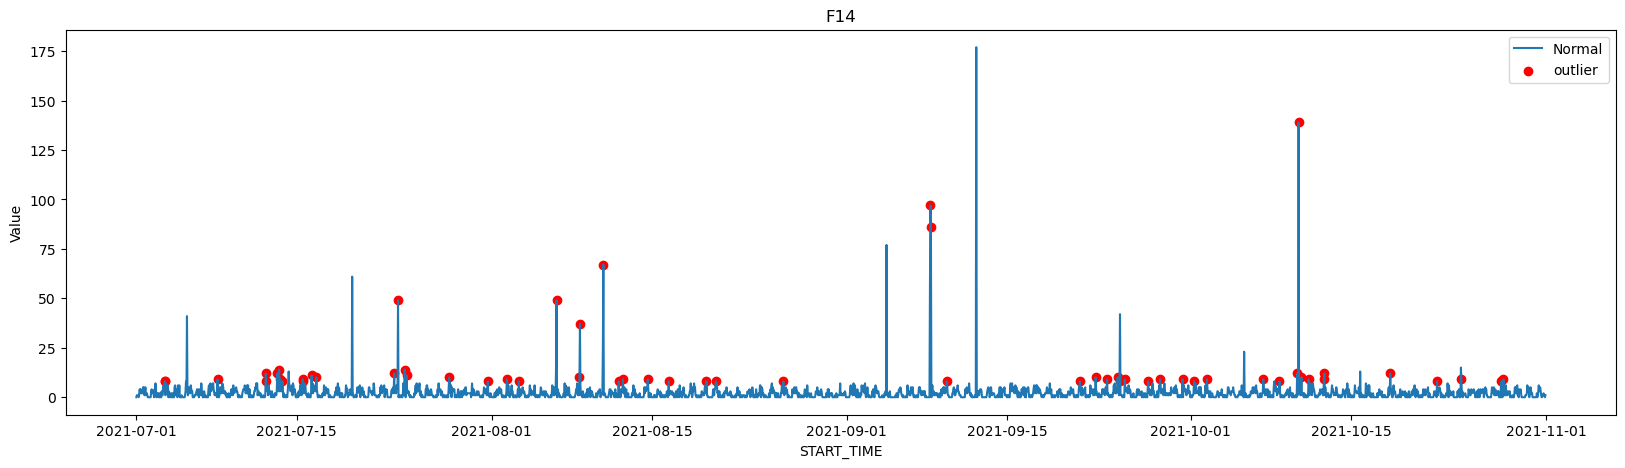

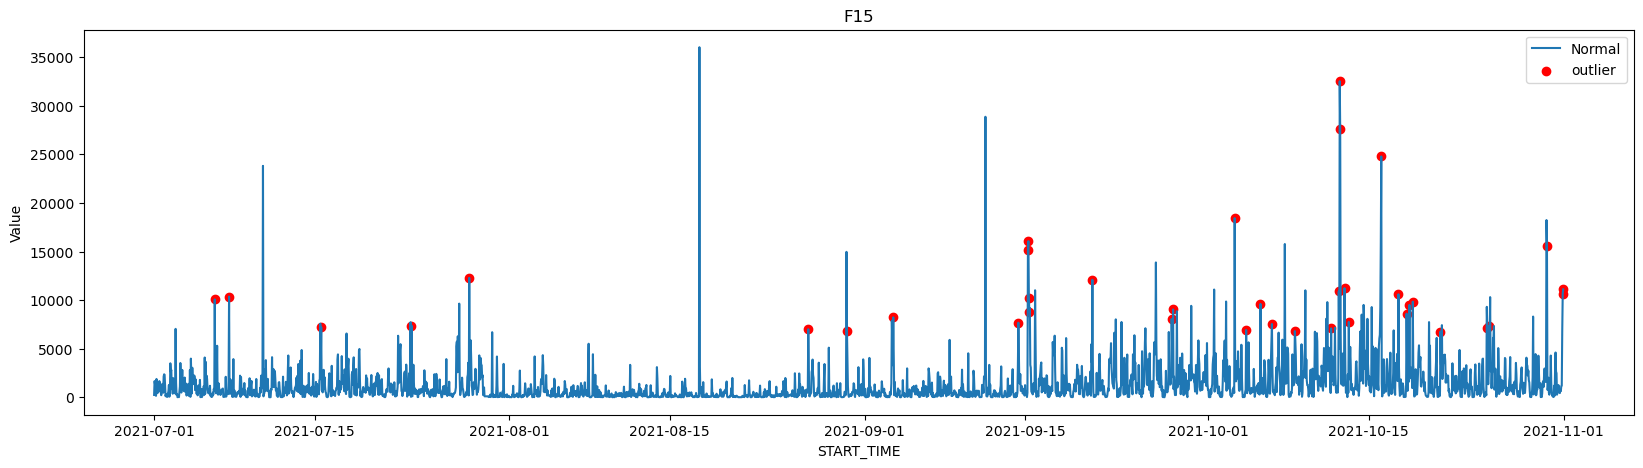

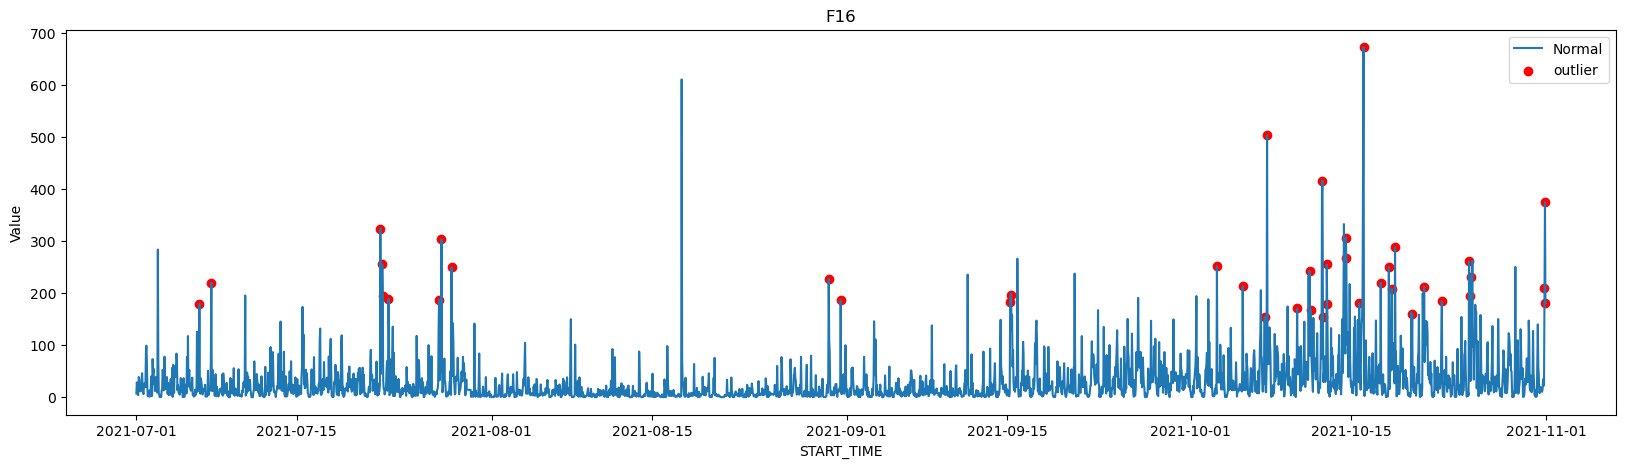

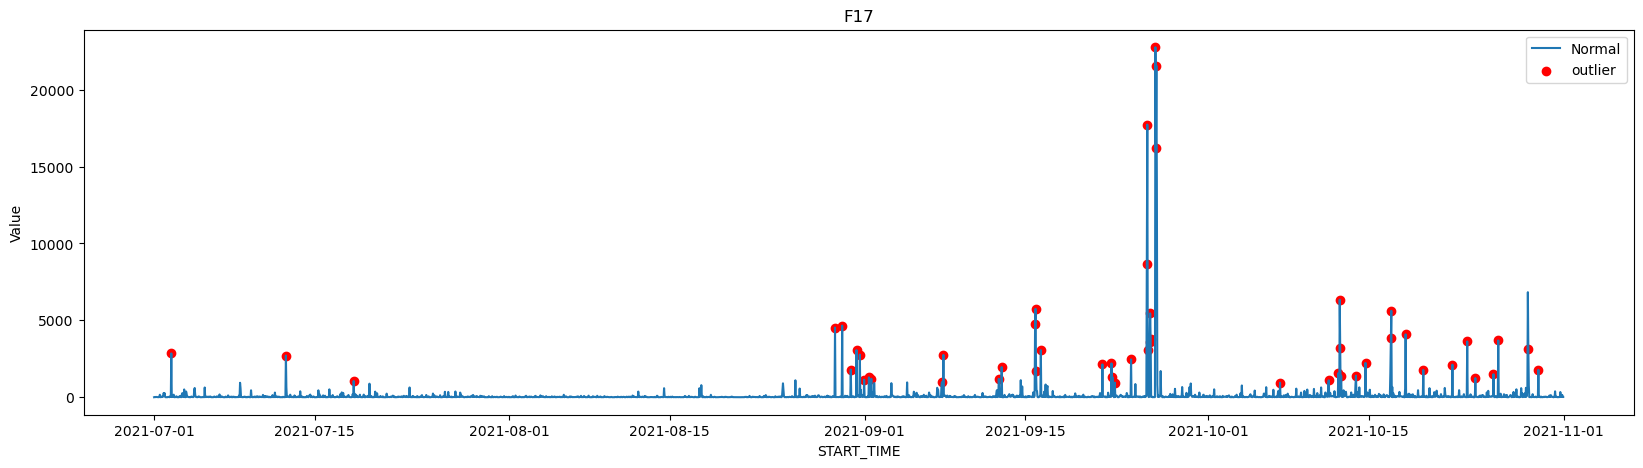

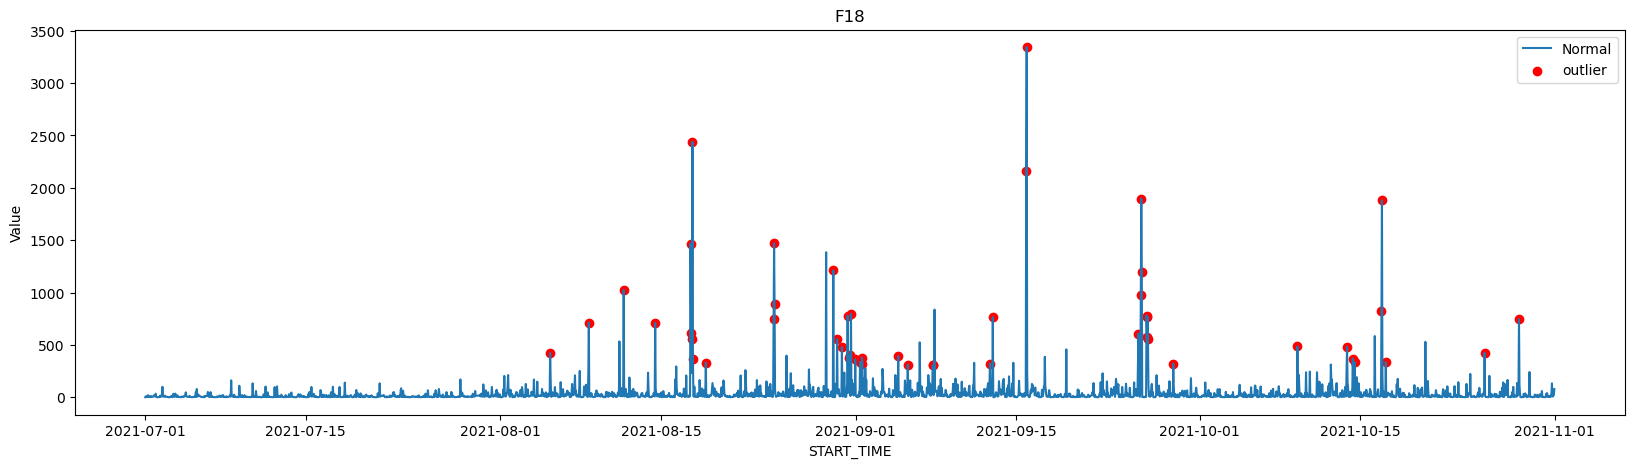

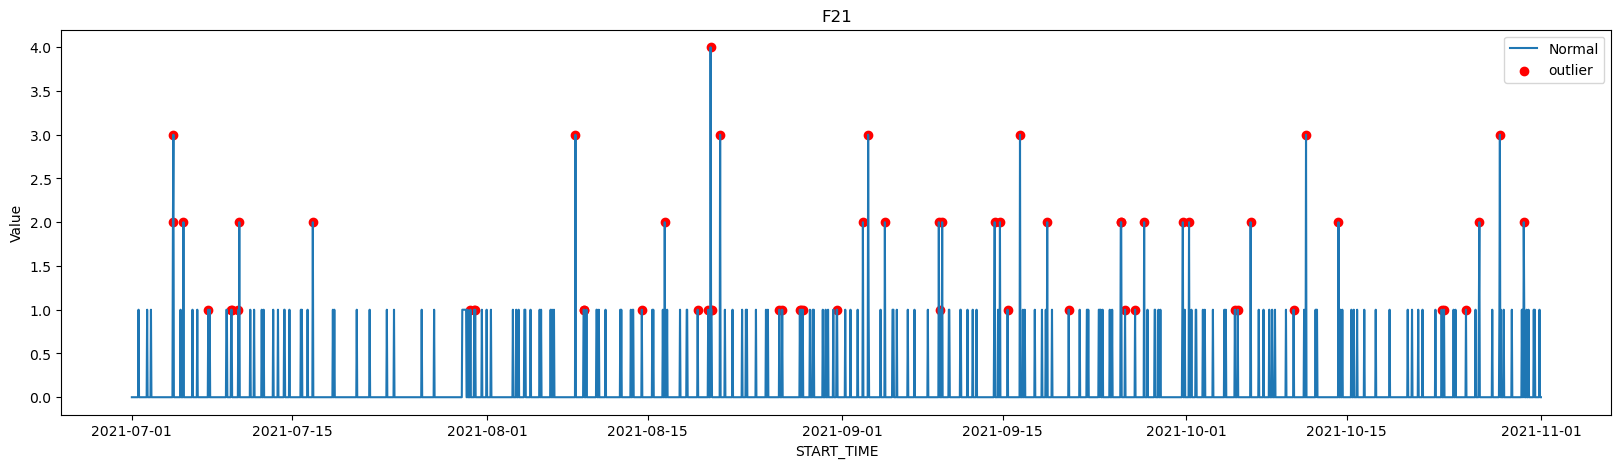

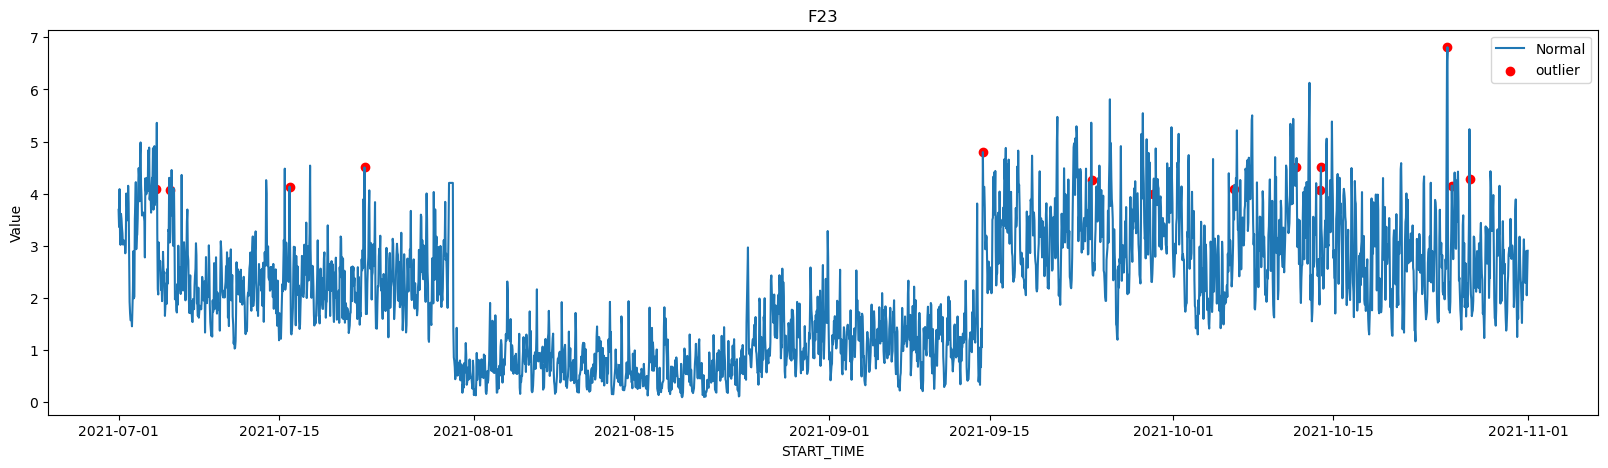

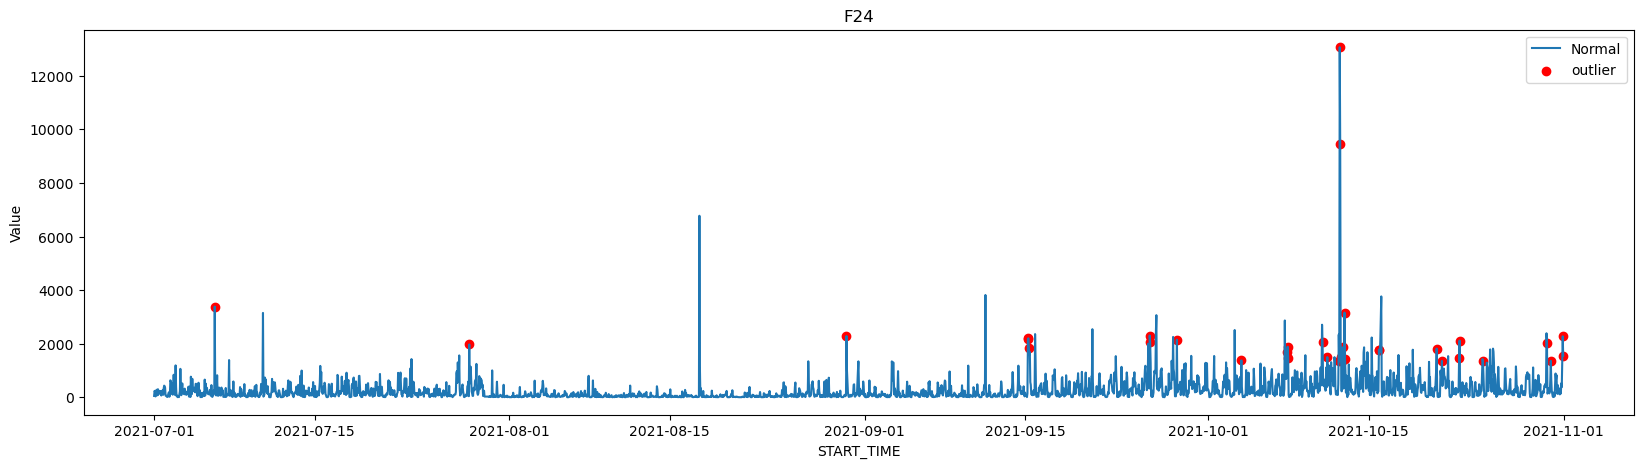

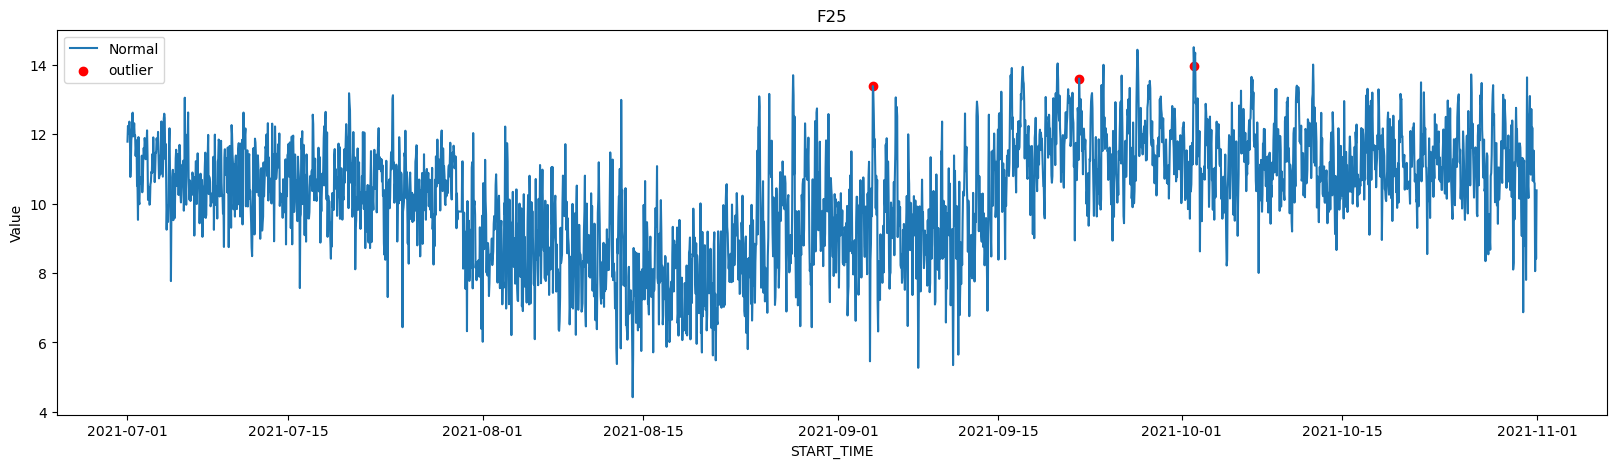

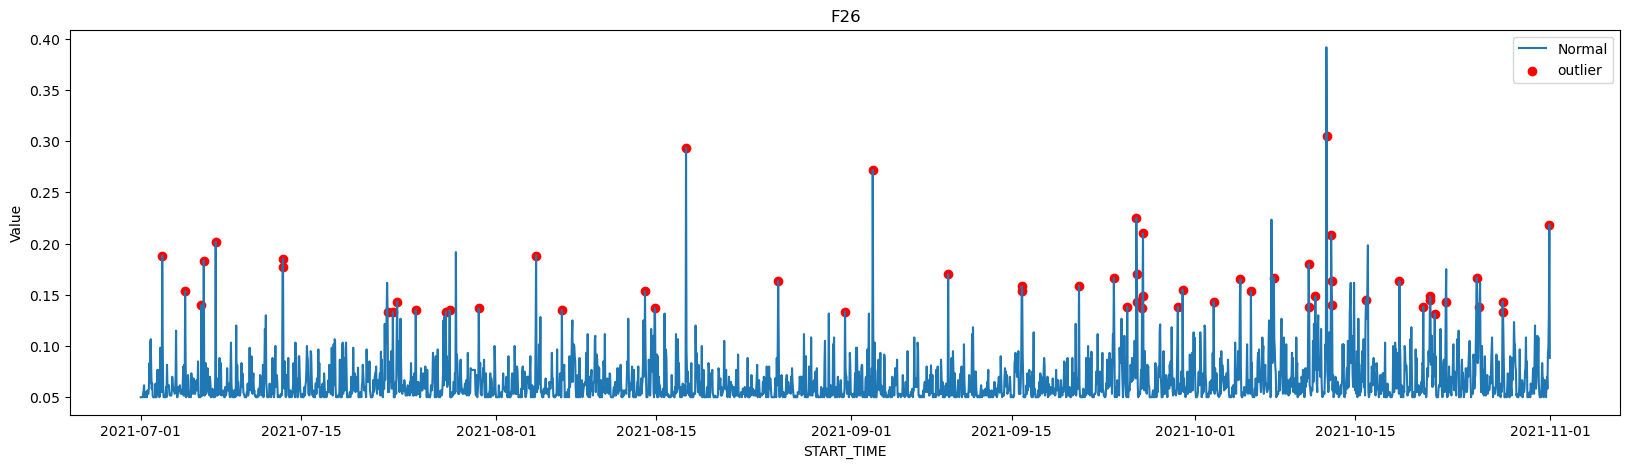

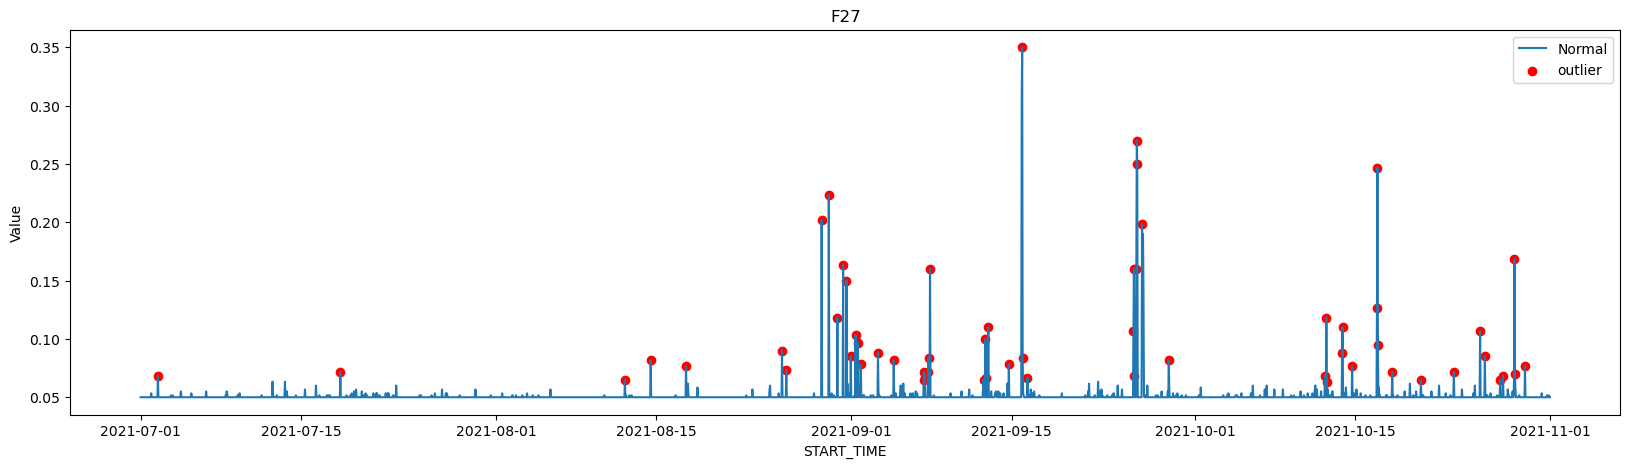

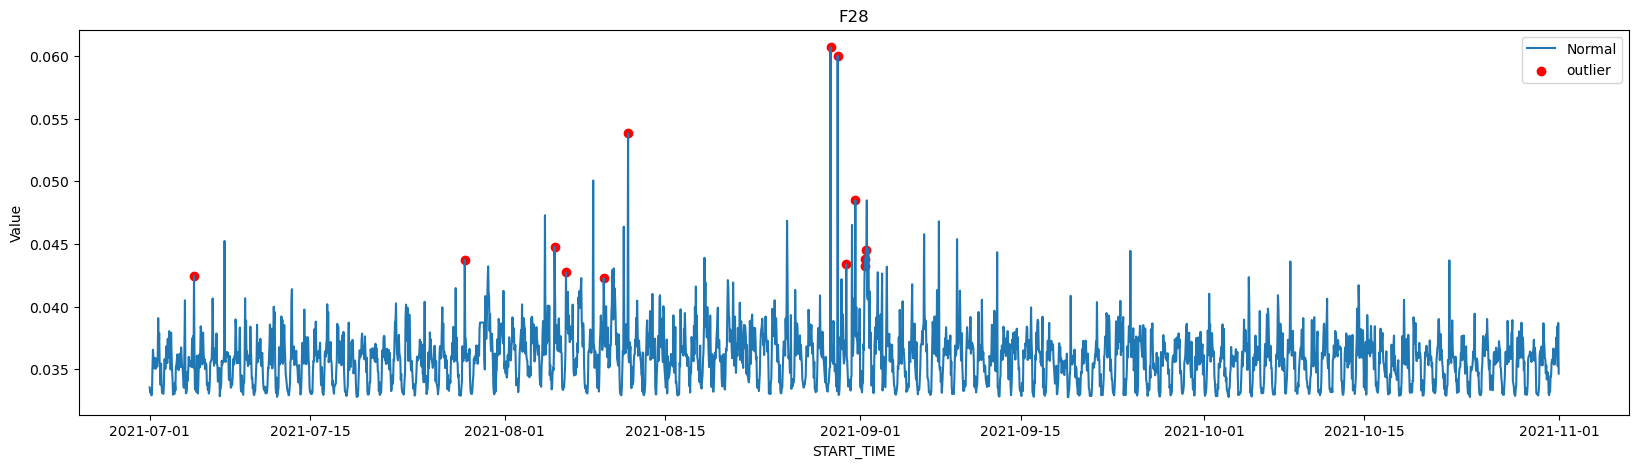

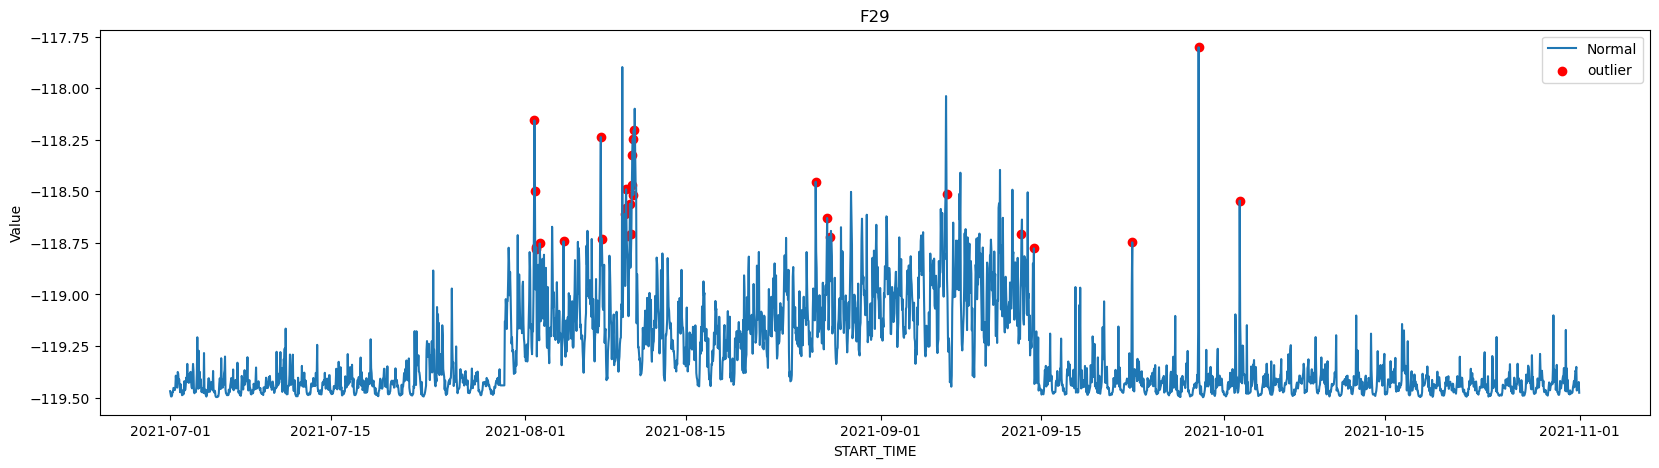

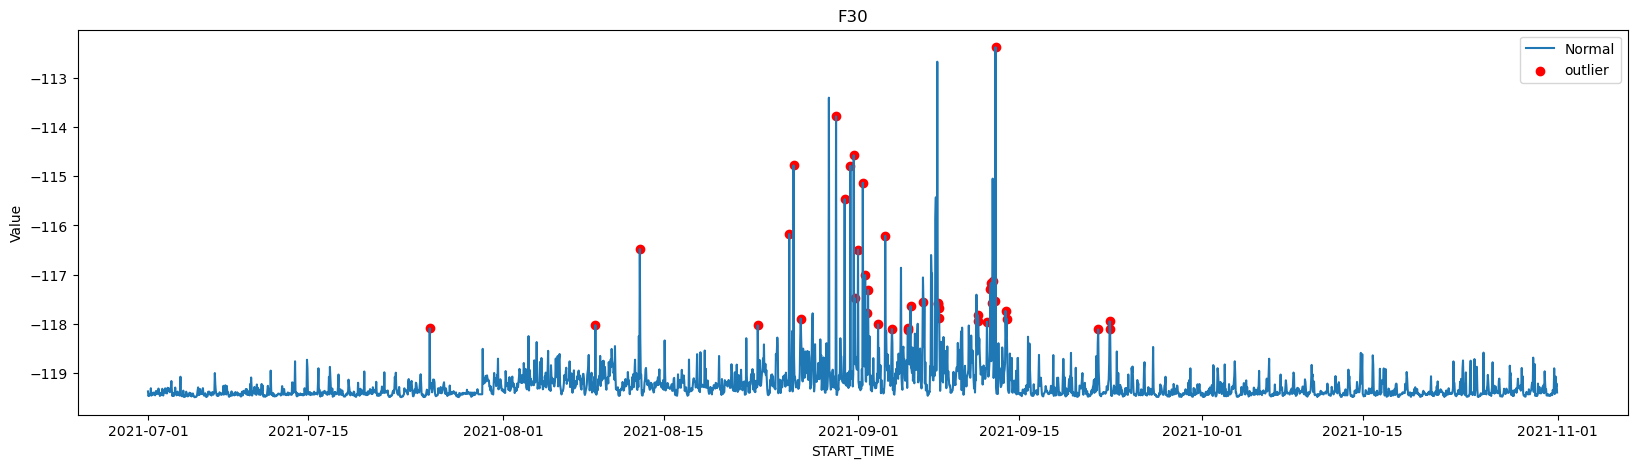

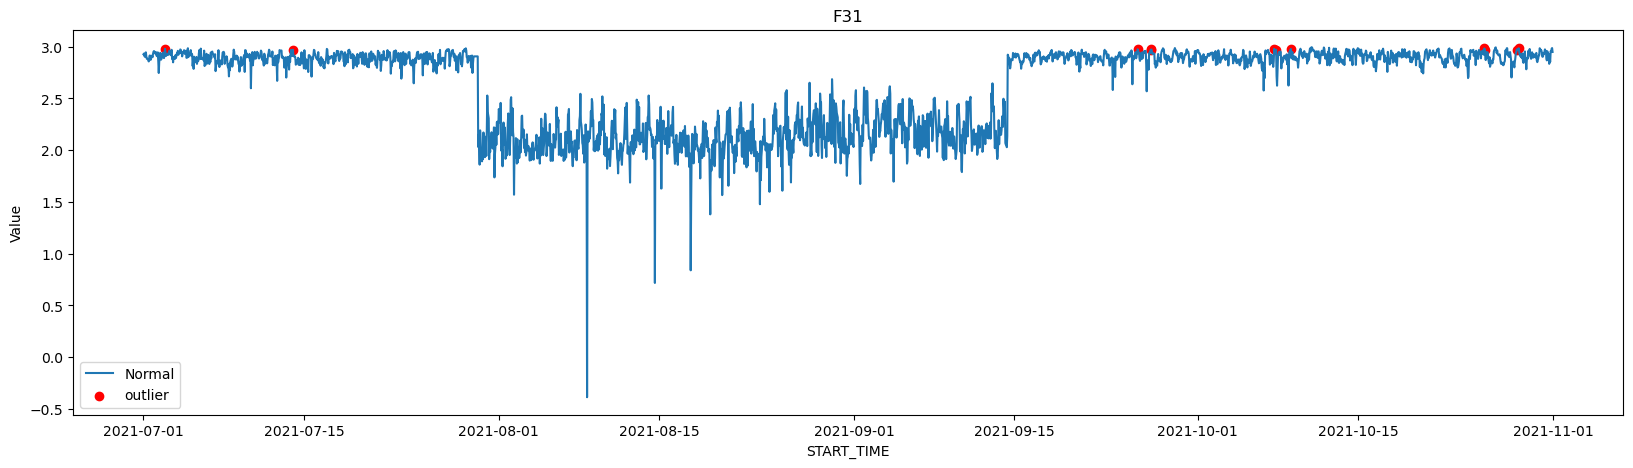

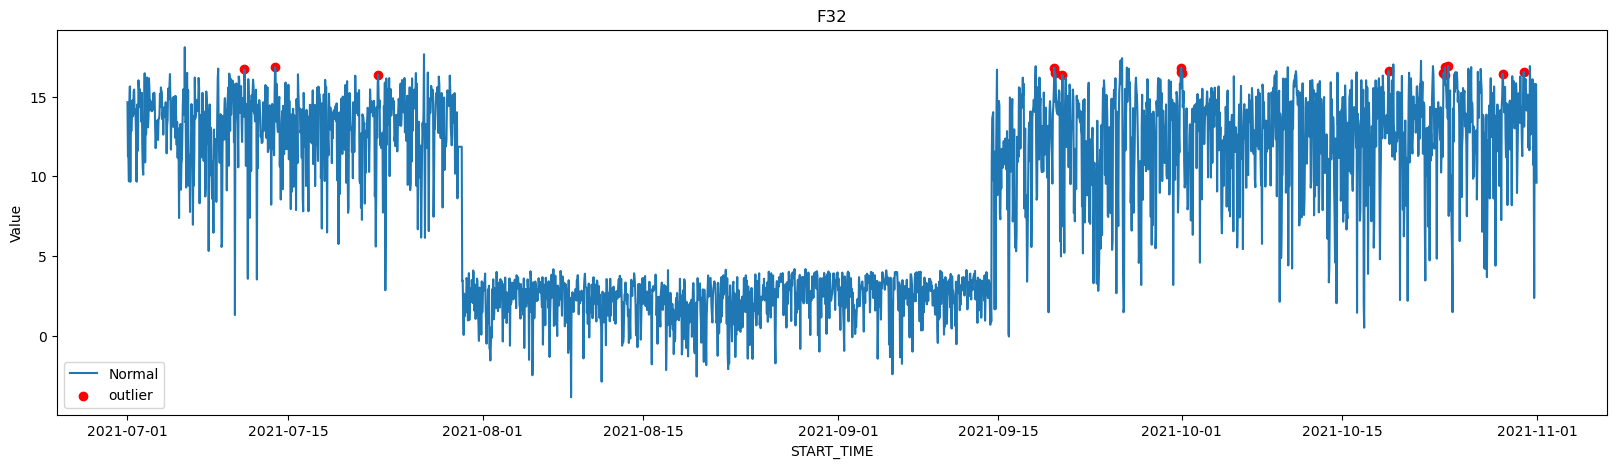

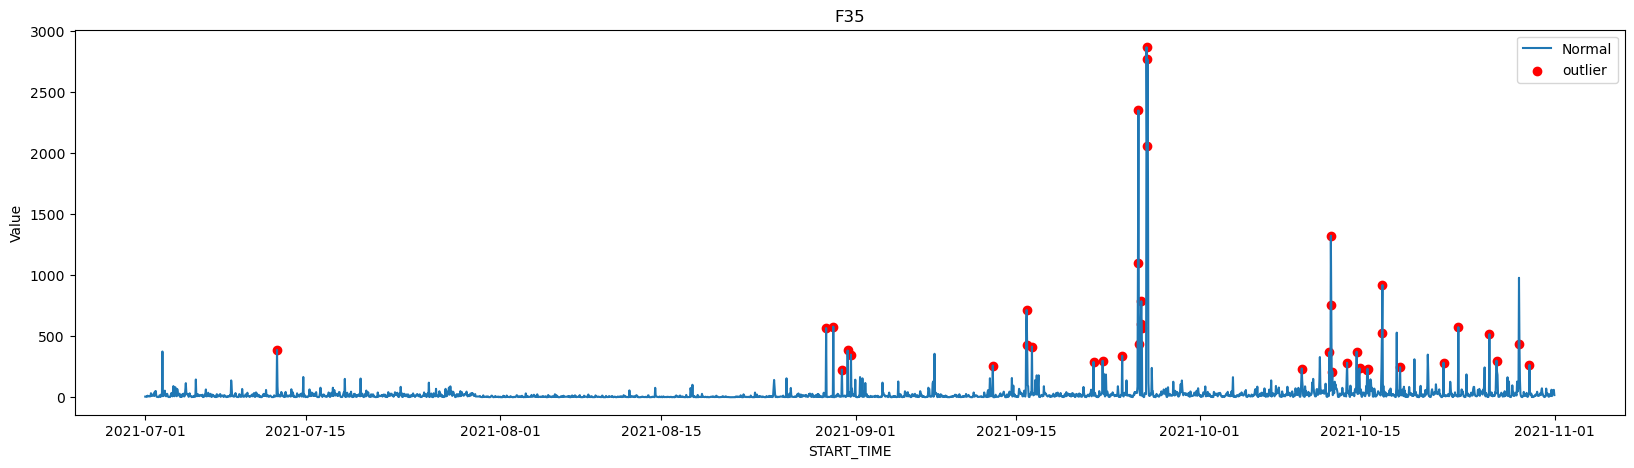

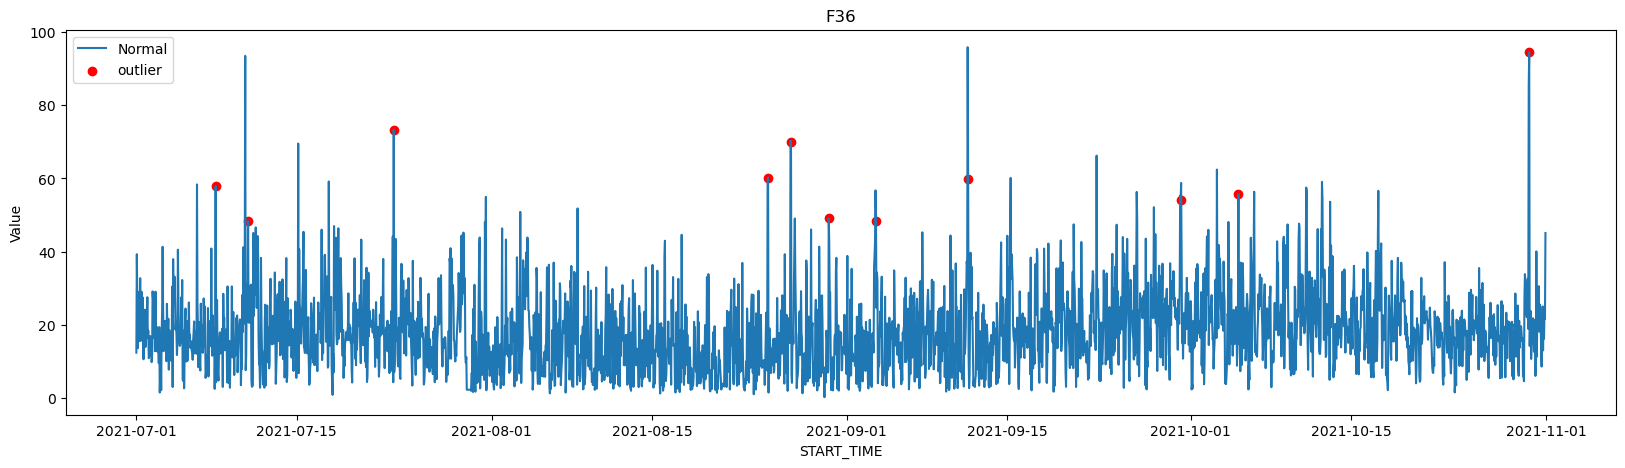

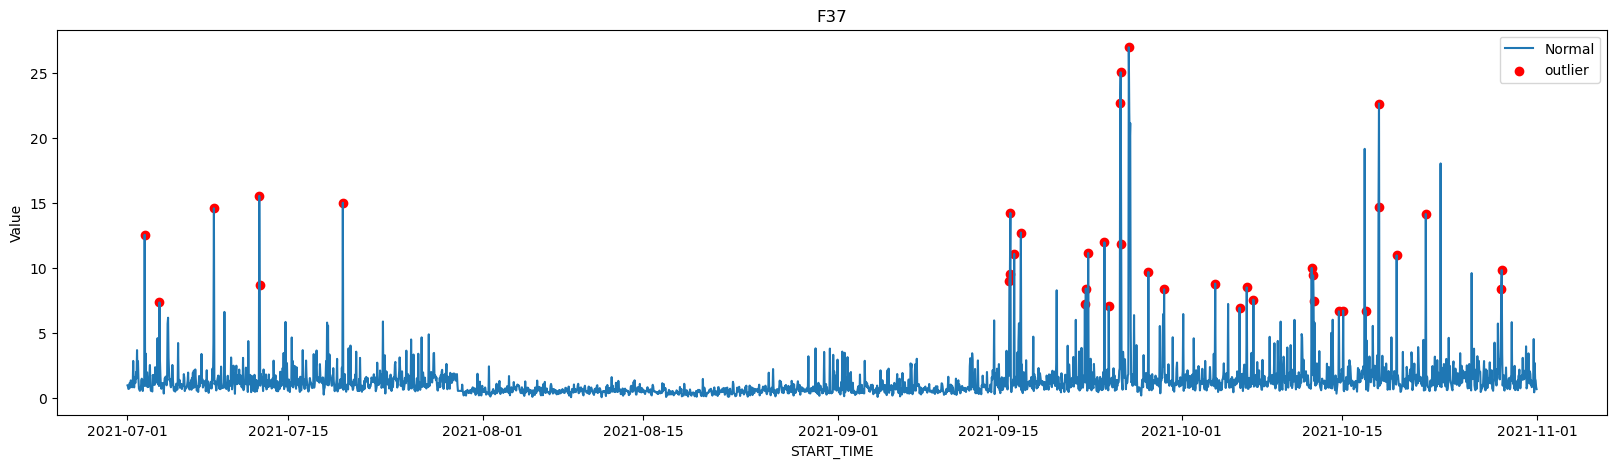

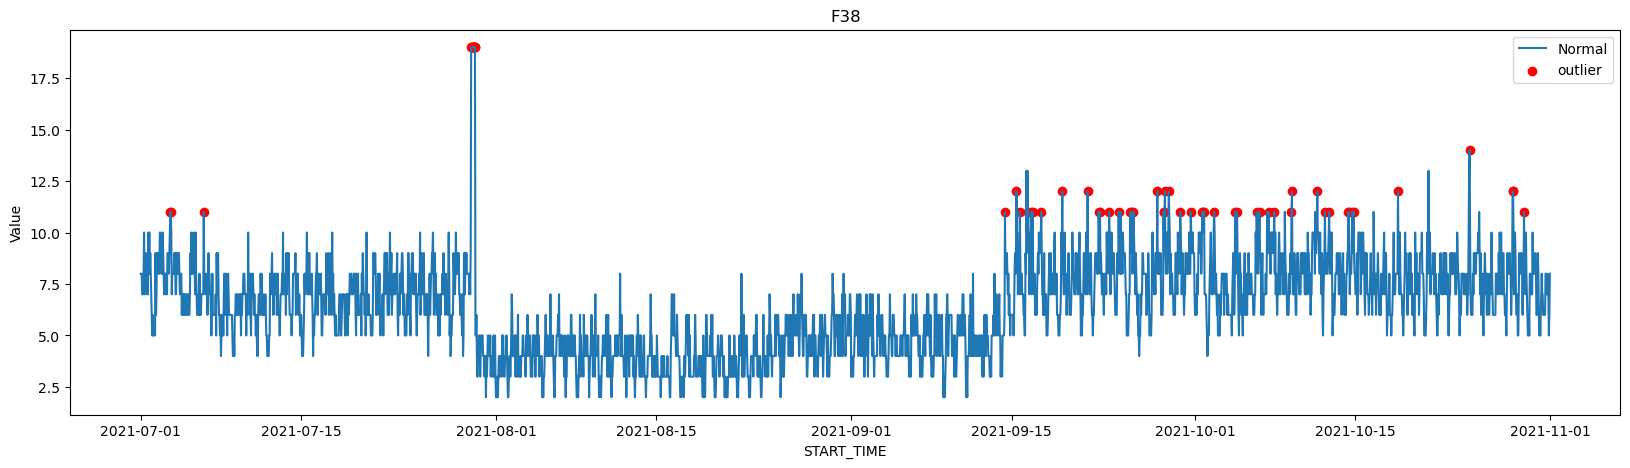

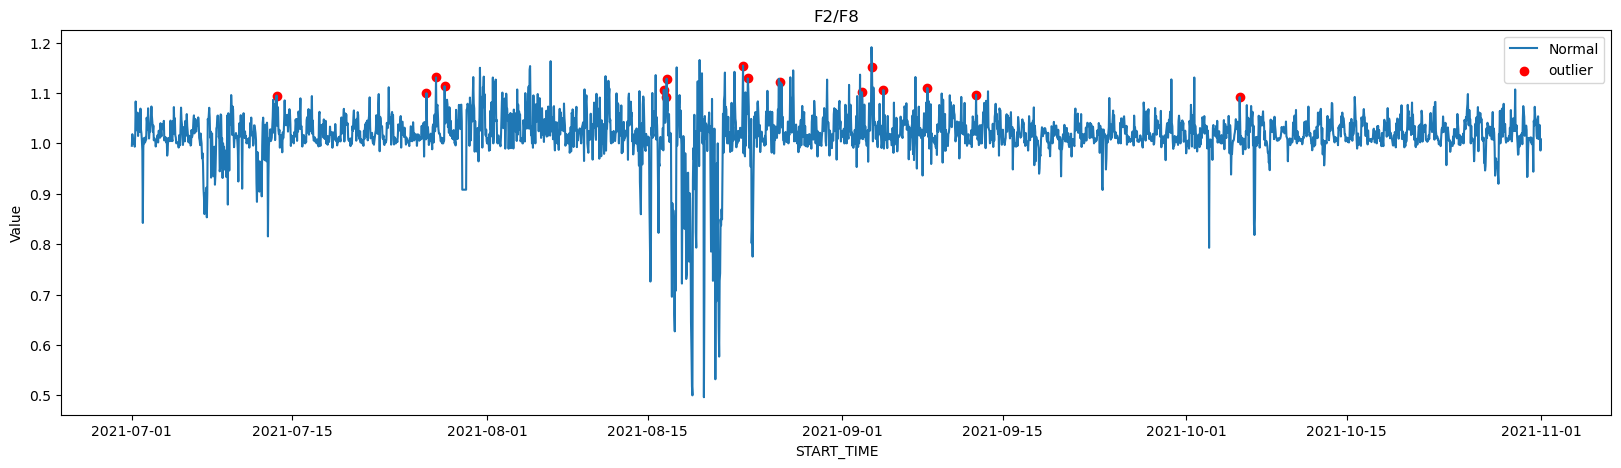

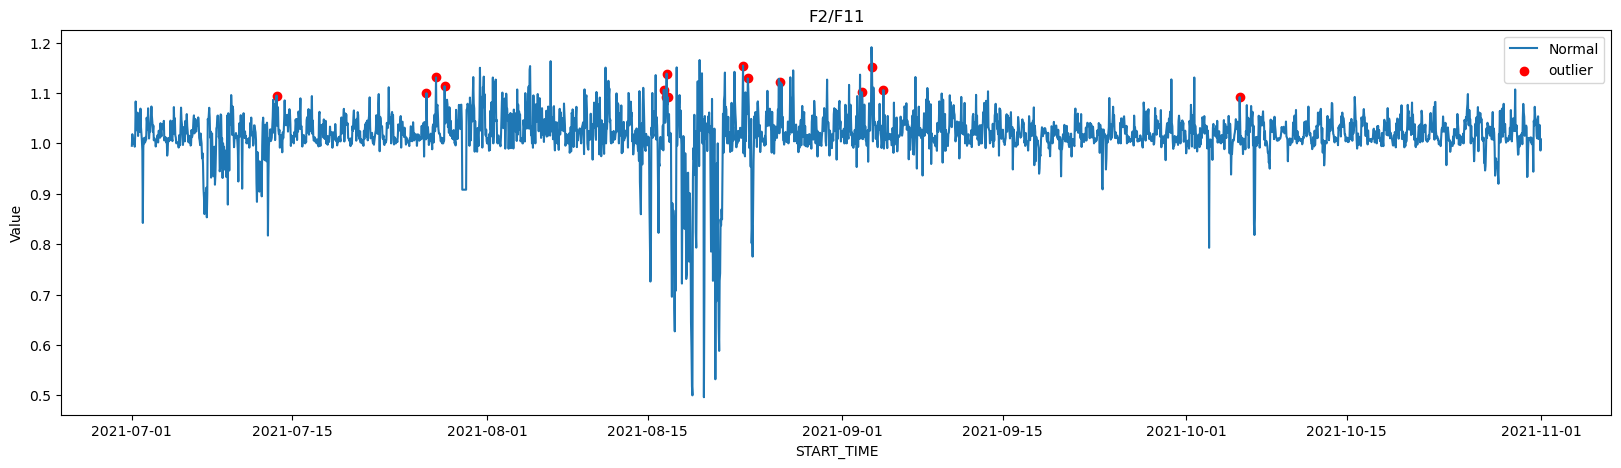

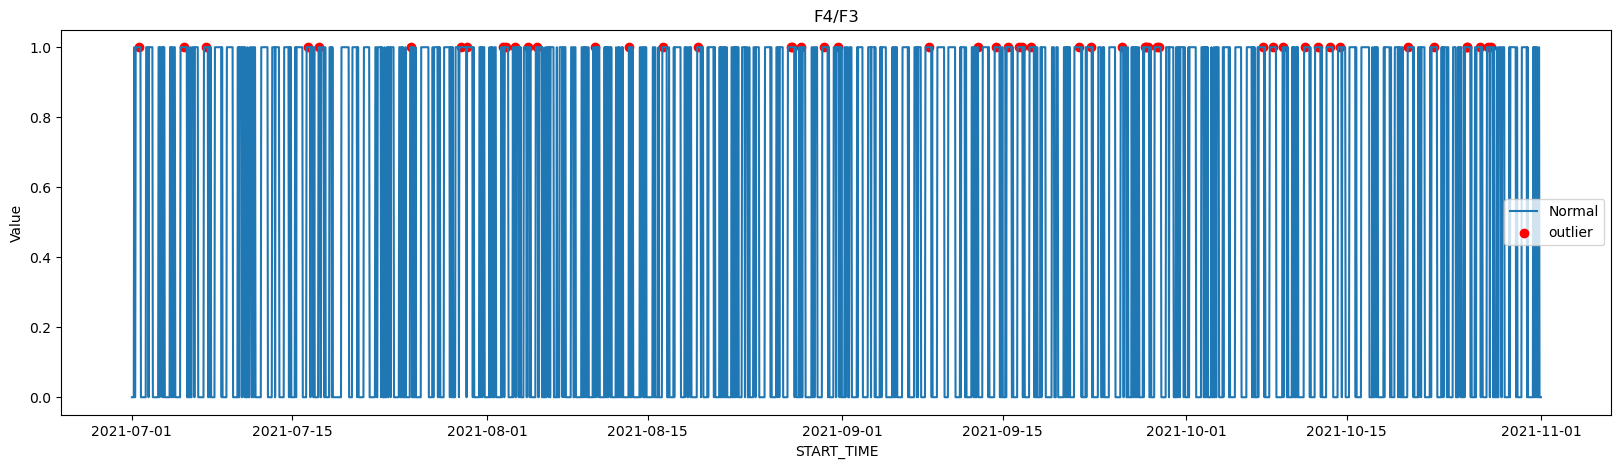

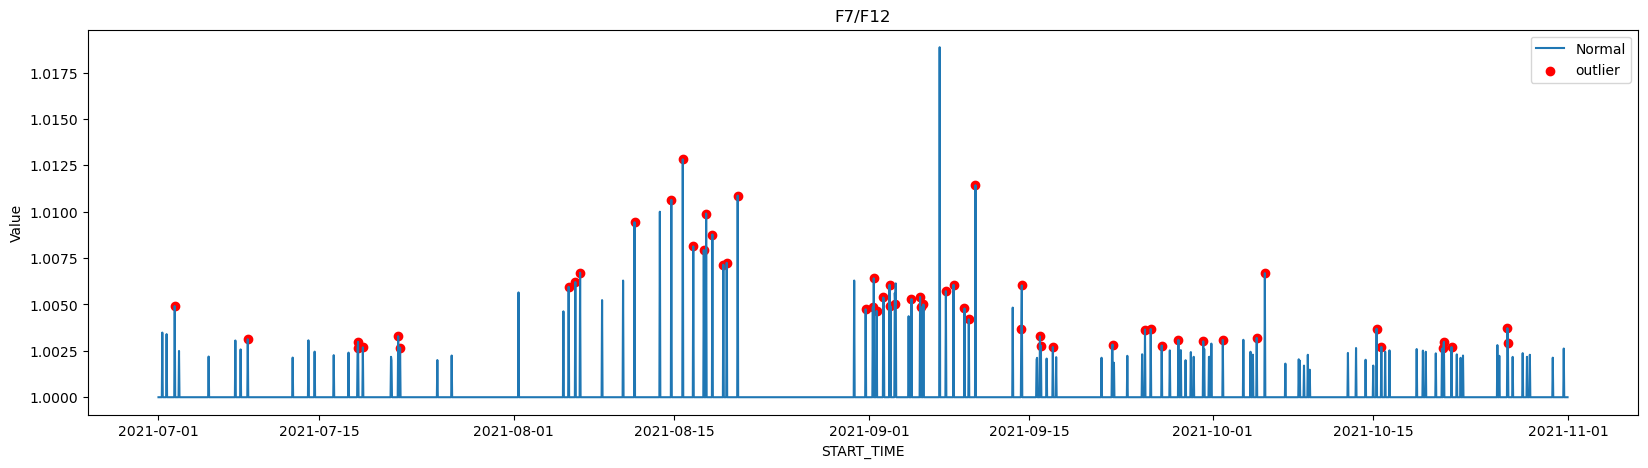

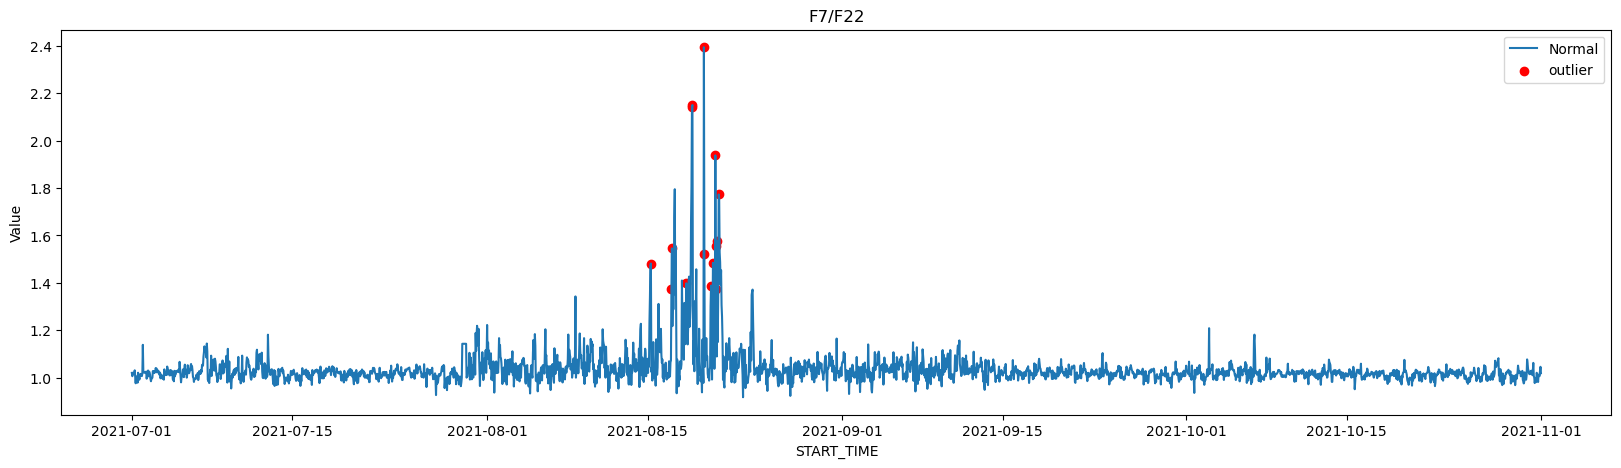

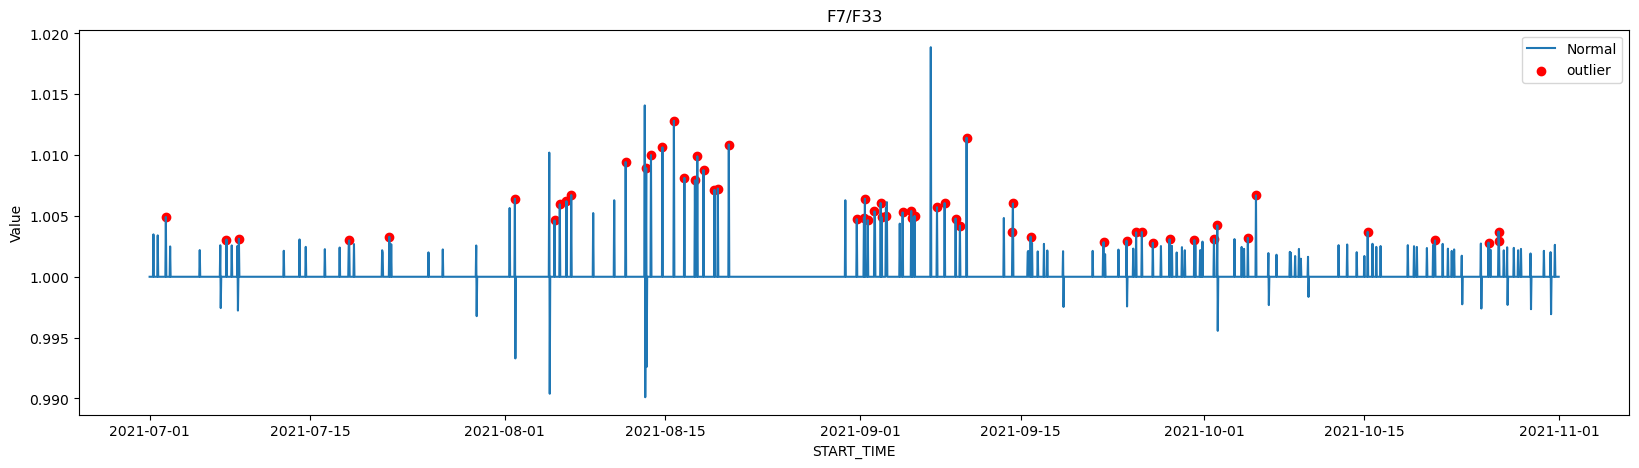

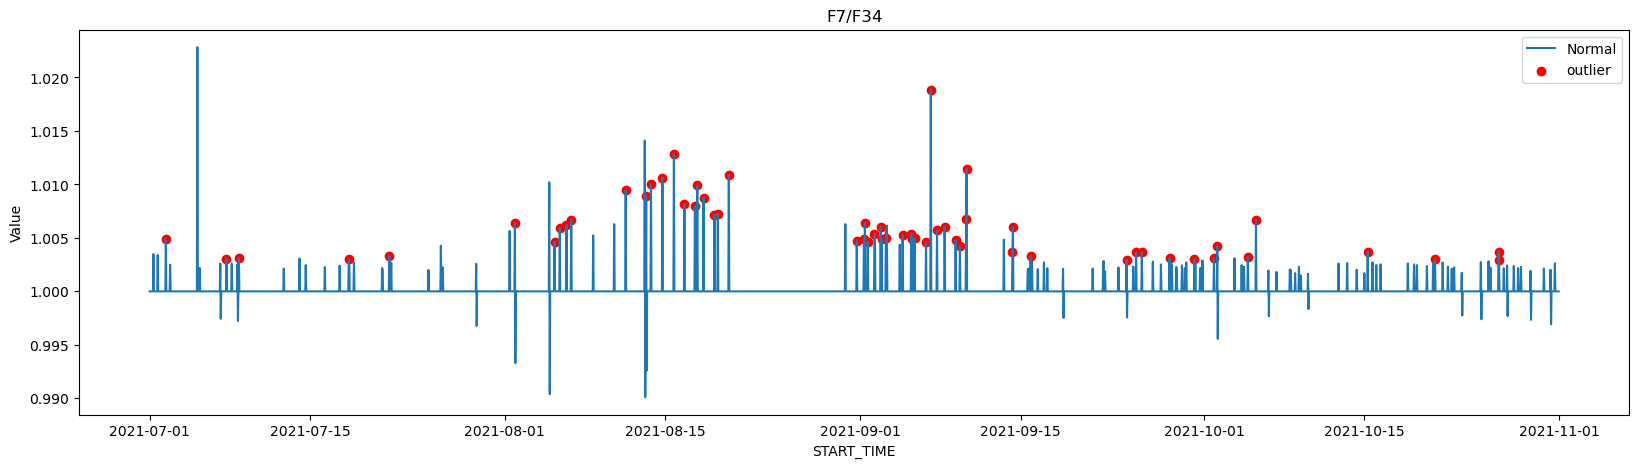

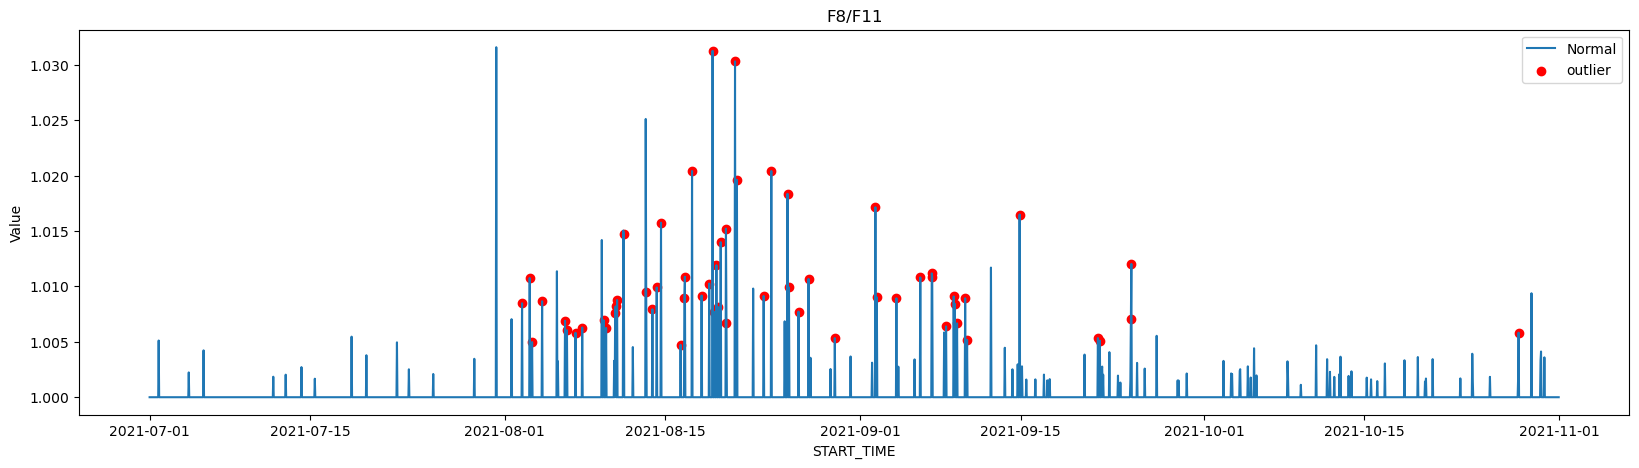

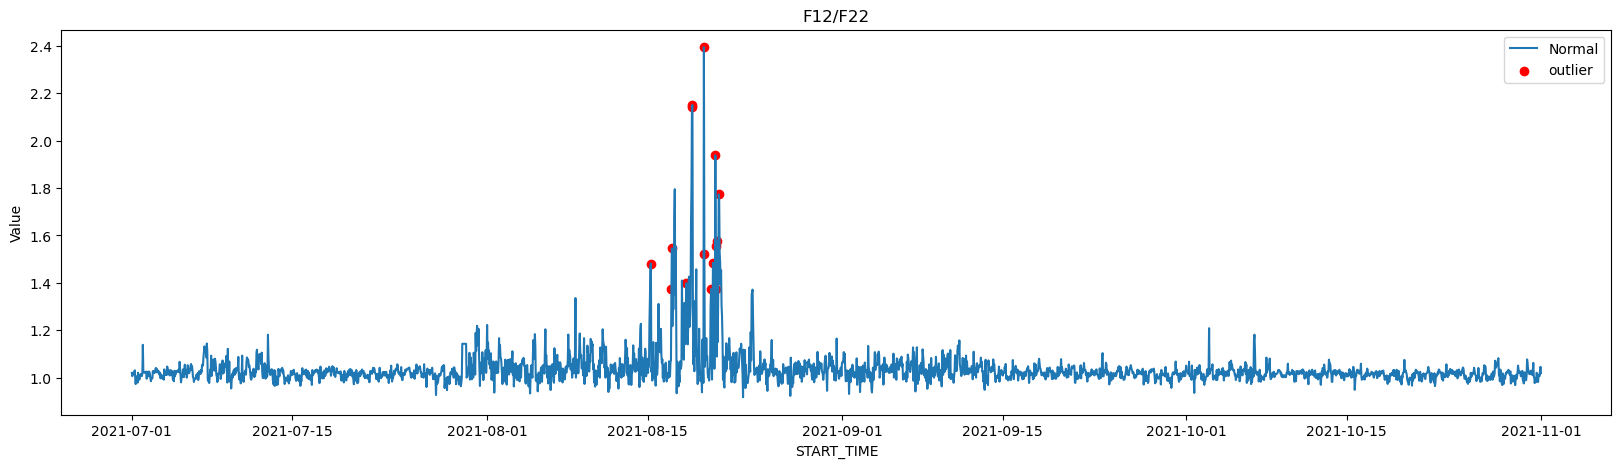

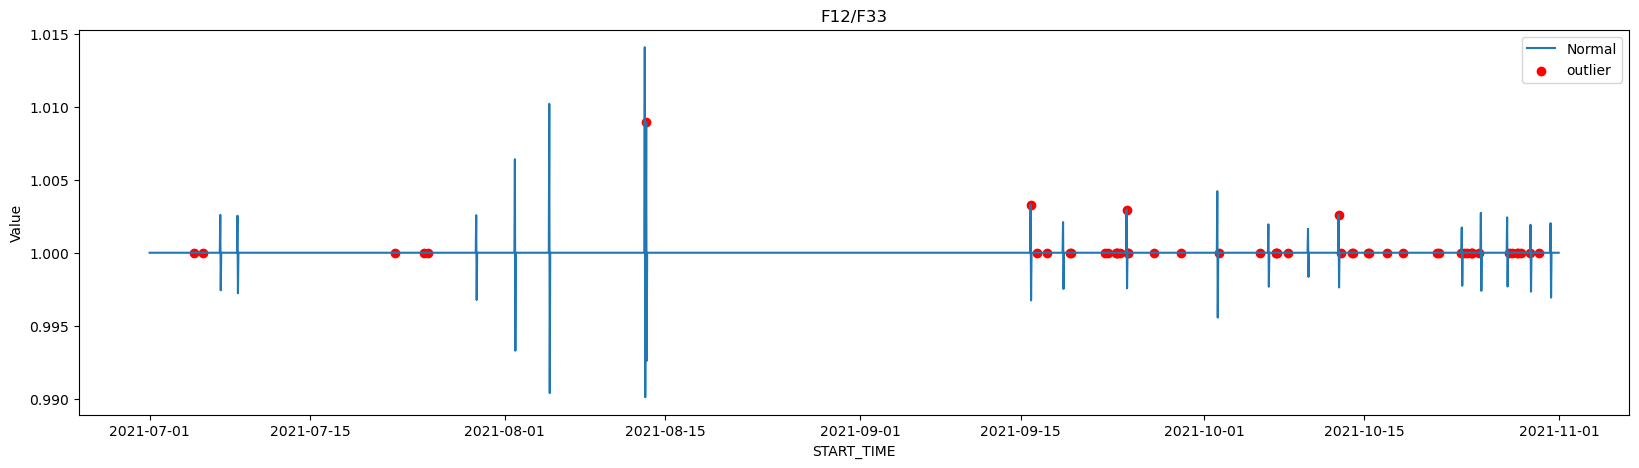

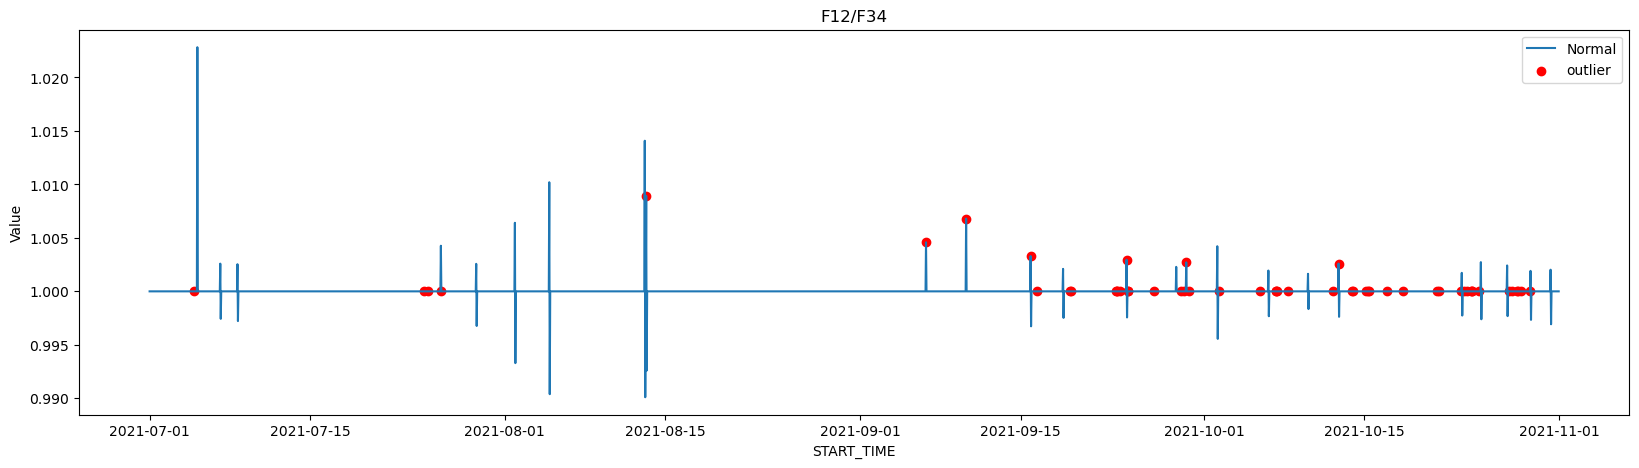

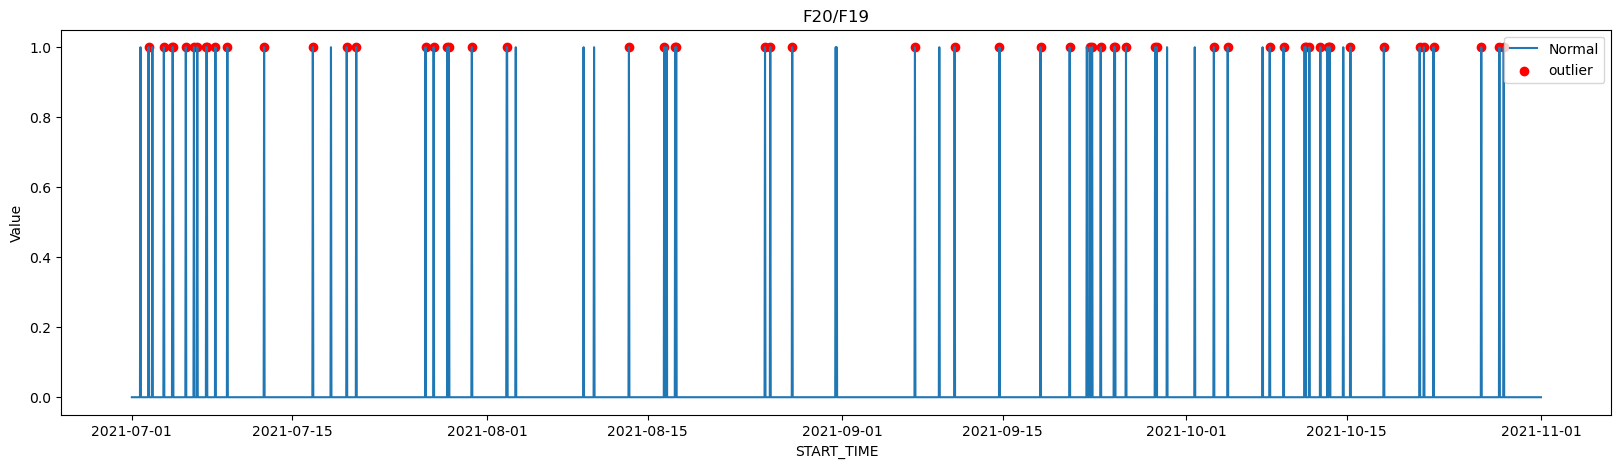

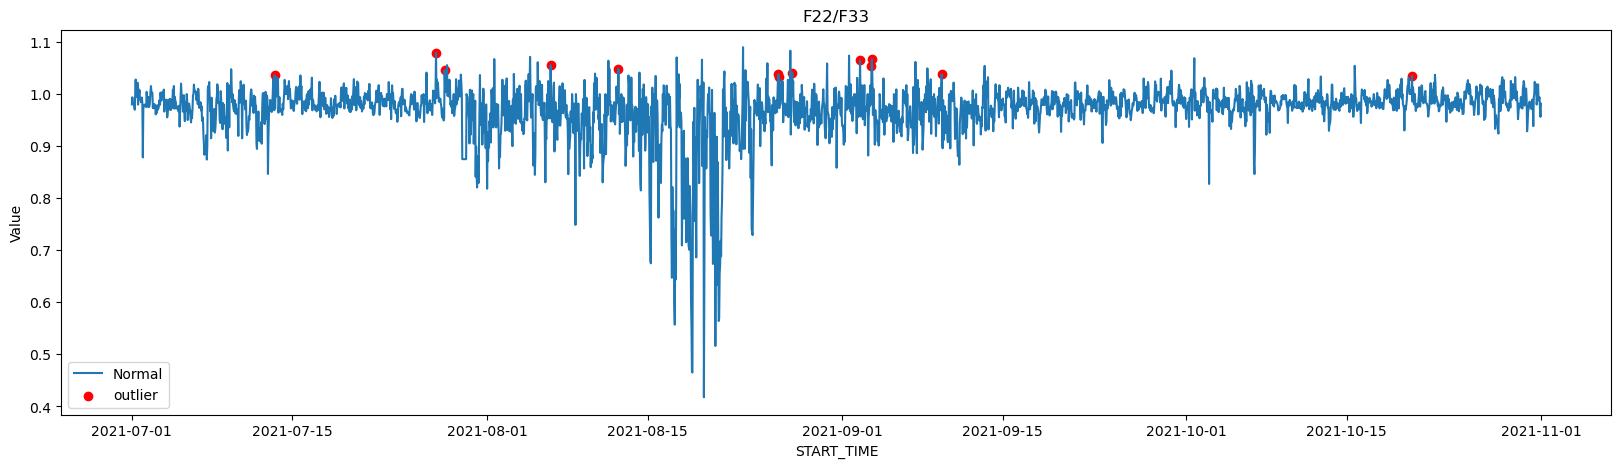

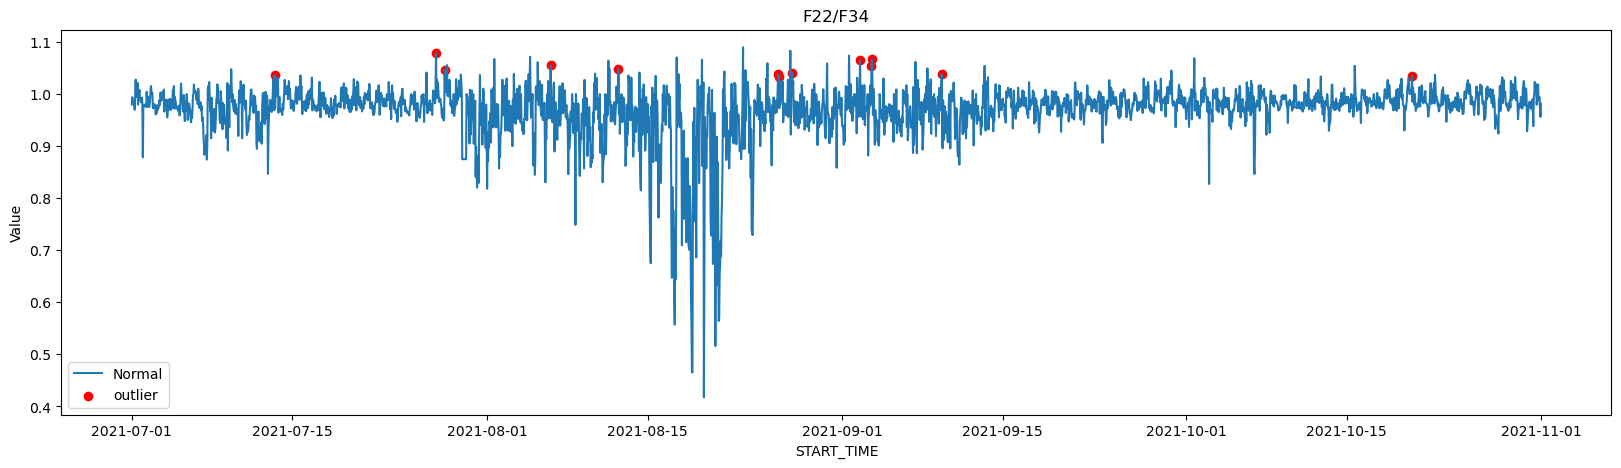

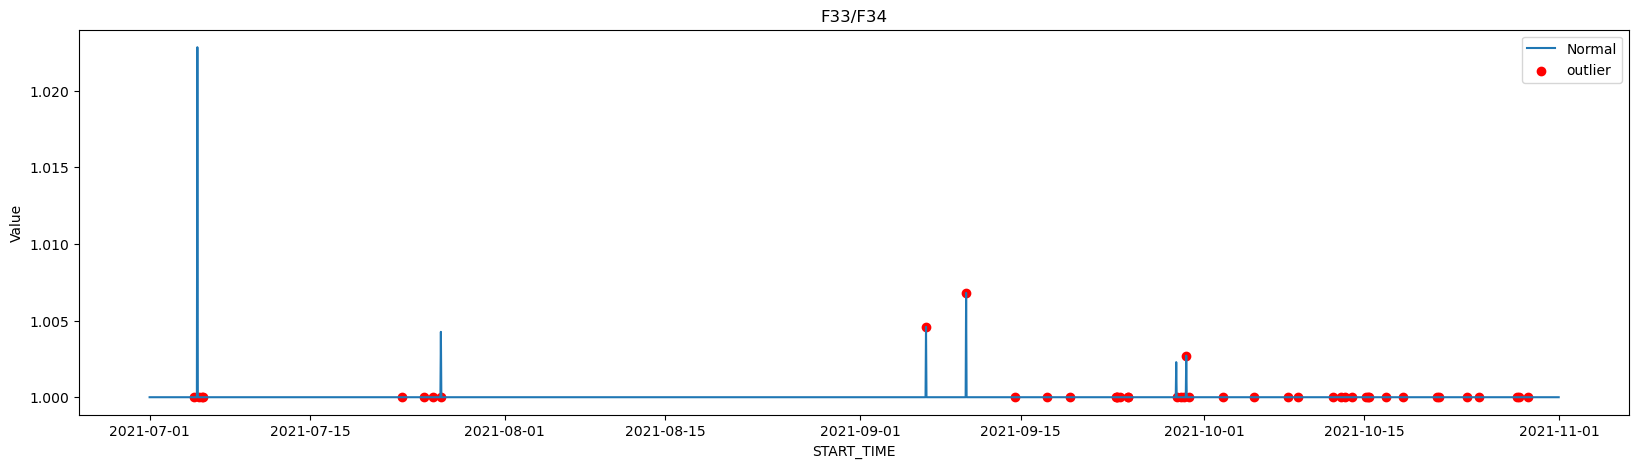

In [13]:
df = pd.read_csv('C:\\Users\\disha\\Downloads\\feature_seln_new.csv', parse_dates=['START_TIME'])
df=df[df.columns[1:]]
for col in df.columns:
    if col!= 'START_TIME':
        outlier = moving_grubbs(df[col],24)
    
        anomalies = df.loc[df[col].isin(outlier)]

        top_n = int(np.ceil(len(anomalies) * 2 / 100))
        top_n_outliers = anomalies.sort_values(by=col, ascending = False).head(top_n)
    
        fig, ax = plt.subplots(figsize=(20,5))
        ax.plot(df['START_TIME'], df[col], label='Normal')
        ax.scatter(top_n_outliers['START_TIME'], top_n_outliers[col], color='red', label='outlier')
        plt.title(col)
        plt.xlabel('START_TIME')
        plt.ylabel('Value')
        plt.legend()
    
        plt.show()
